## **CUSTOS DE PLANO DE SAÚDE**

**Nome do dataset:** Medical Cost Personal (disponível no Kaggle);

**Objetivo:** Em um primeiro momento, apresentar uma análise exploratória dos dados, retirando seus principais *insights*, já em um segundo modelo, trabalhar com *Machine Learning* (ML) para prever custos individuais de planos de saúde de acordo com o algorítmo e as variáveis selecionadas; 


**Objetivo pessoal:** 
1. Treinar capacidade de analisar dados;
2. Aplicar diferentes algorítmos de ML para visualizar na prática o seu funcionamento. 

## IMPORTANDO BIBLIOTECAS

In [44]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip  #para pandas_profilling funcionar no google colab

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [45]:
#Começando por bibliotecas gerais 
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport


## IMPORTANDO DATASET

In [46]:
gitds = 'https://raw.githubusercontent.com/vicctoriia/ML_MedicalCost/main/insurance.csv'
dados = pd.read_csv(gitds)

## ANÁLISE EXPLORATÓRIA 

**Básico:**

In [47]:
dados.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

**Ou seja, há 7 colunas:** Idade, Sexo, Índice de massa corporal (bmi), dependentes, fumantes (ou não), região e custo indívidual do plano de saúde.





In [48]:
dados.describe()  #Estatísticas básicas

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
dados.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [51]:
dados.shape

(1338, 7)

**Visualização:**

In [52]:
#Importando mais bibliotecas:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [53]:
#Testando algumas bibliotecas "automáticas" para visualização de dados:

Relatorio = ProfileReport(dados, title = 'Custos Médicos', html ={'style':{'full_width': True}})
Relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
!pip install sweetviz # outra biblioteca que não está instalada no colab


In [55]:
import sweetviz

In [56]:
Relatorio_2 = sweetviz.analyze([dados, "Insurance"], target_feat = "charges") 
Relatorio_2.show_html() #Cria um arquivo HTML com análise de dados

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



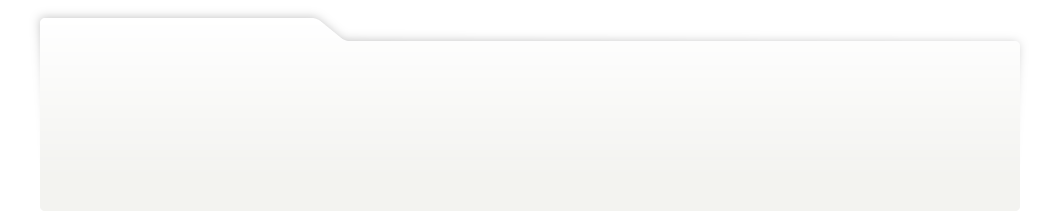
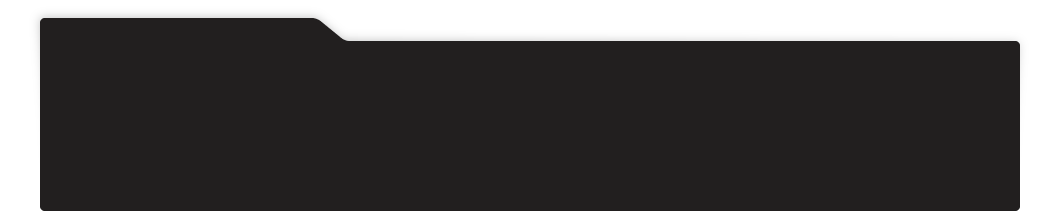
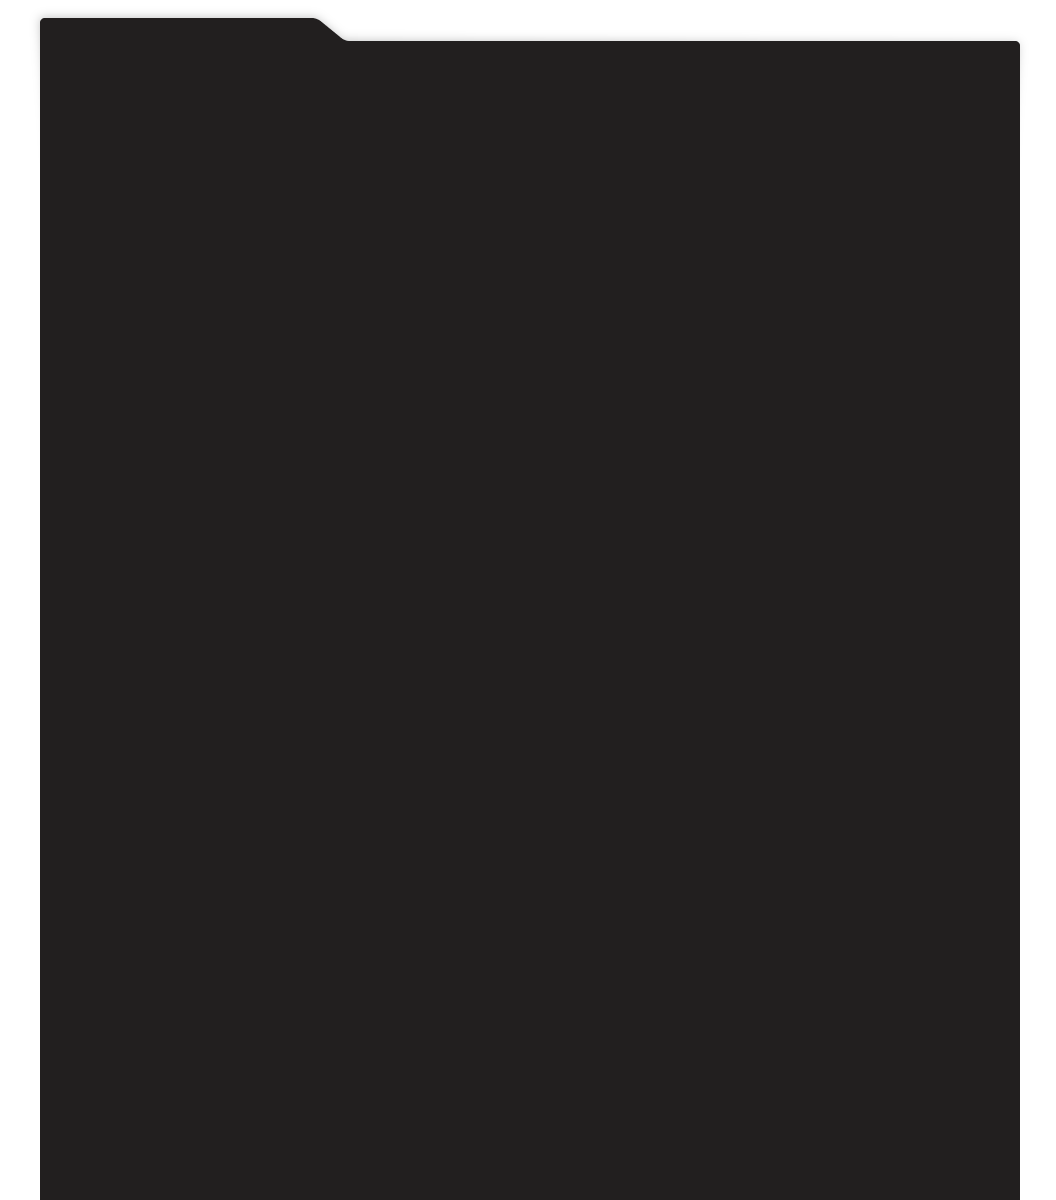
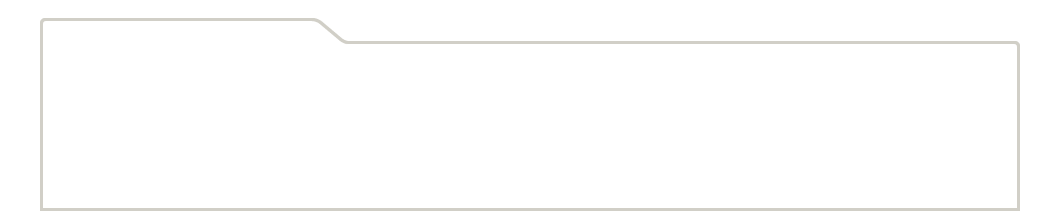
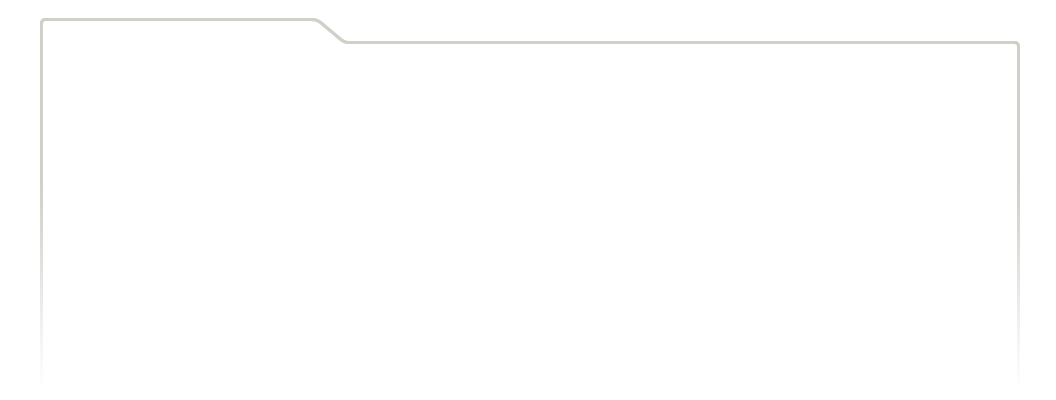
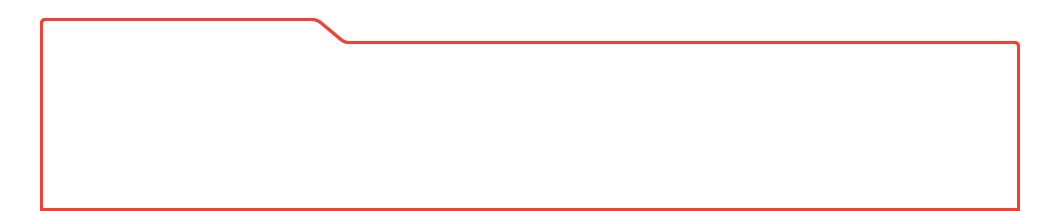
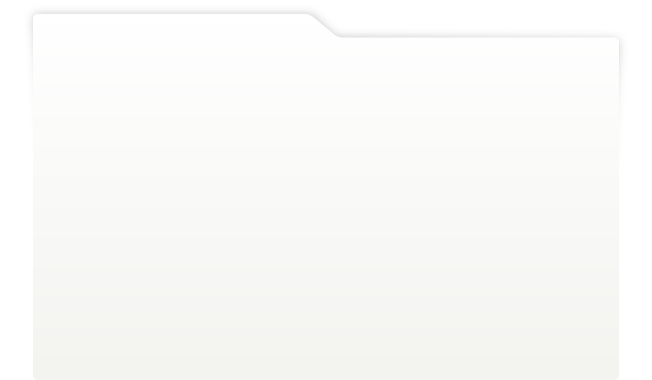
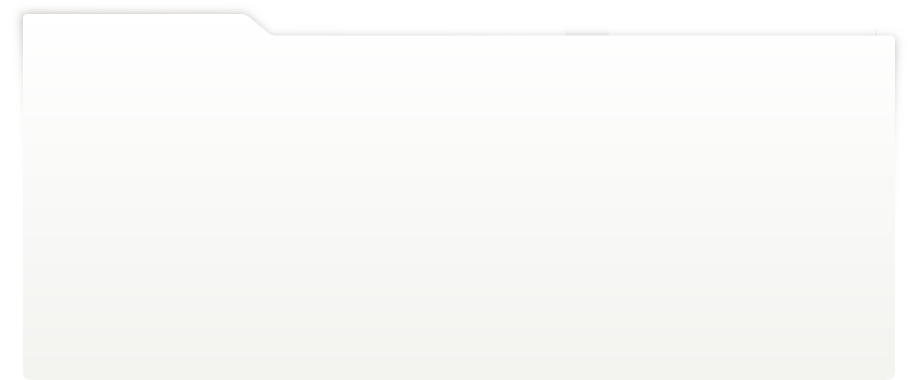
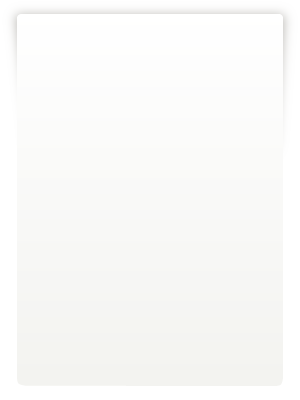
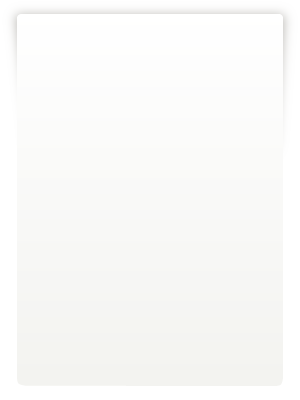
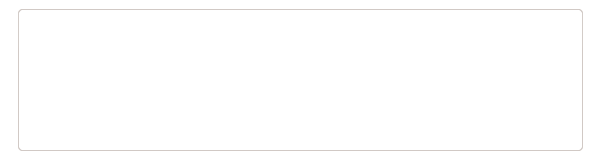
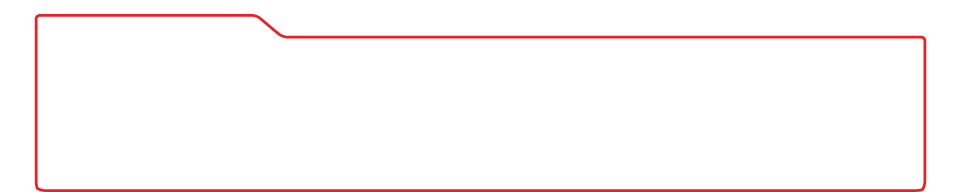
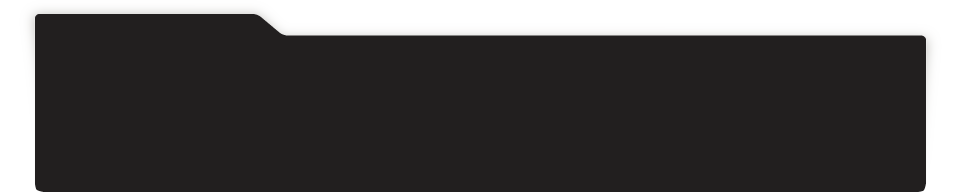
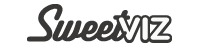
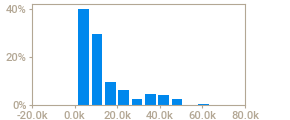
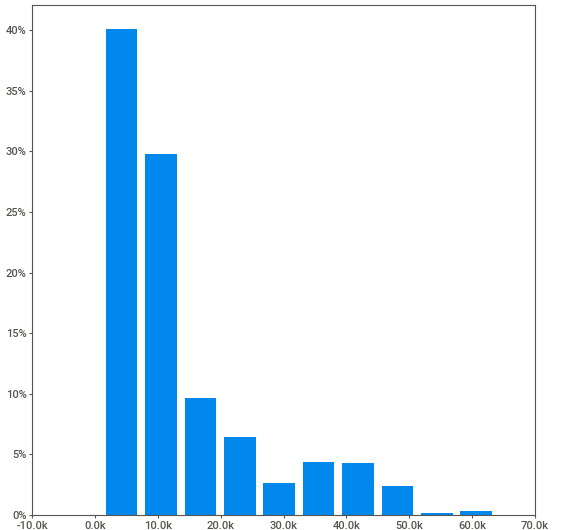
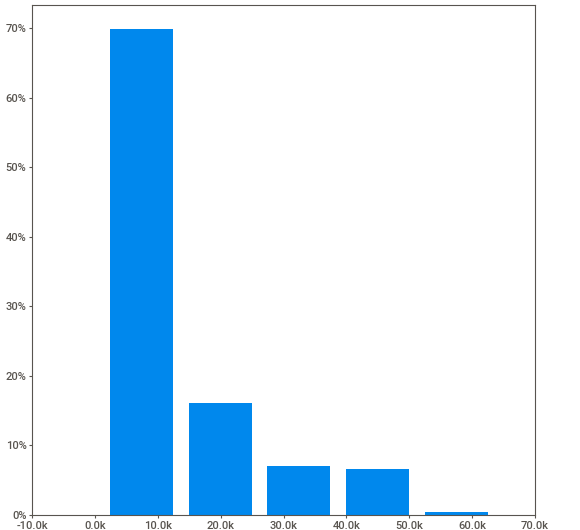
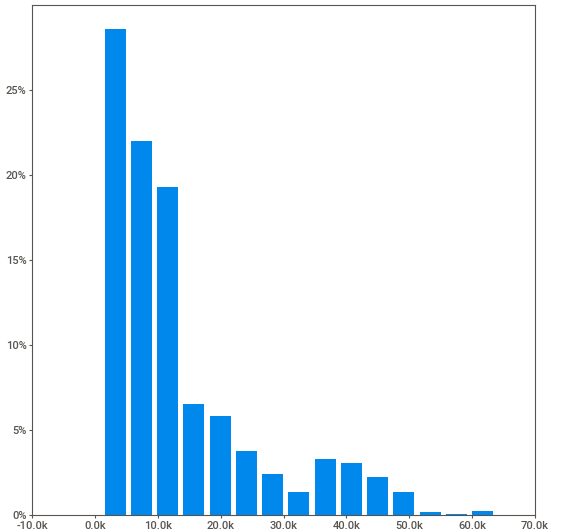
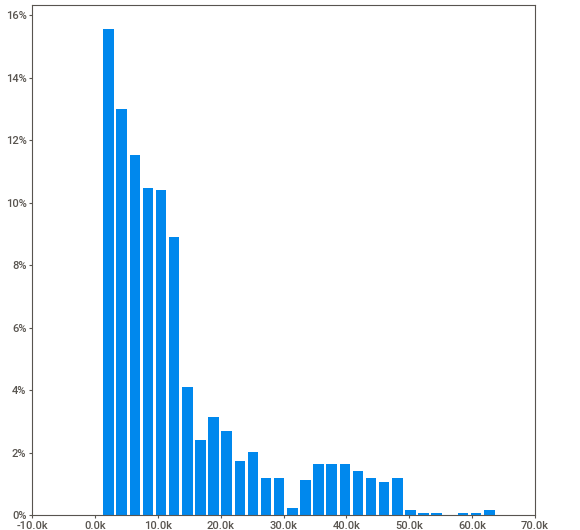
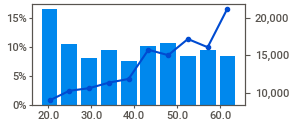
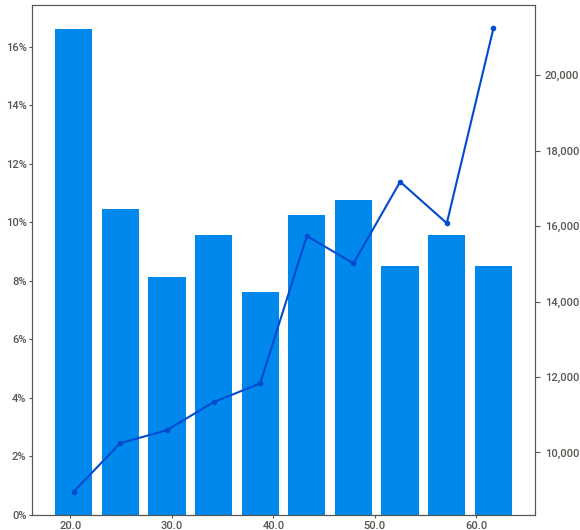
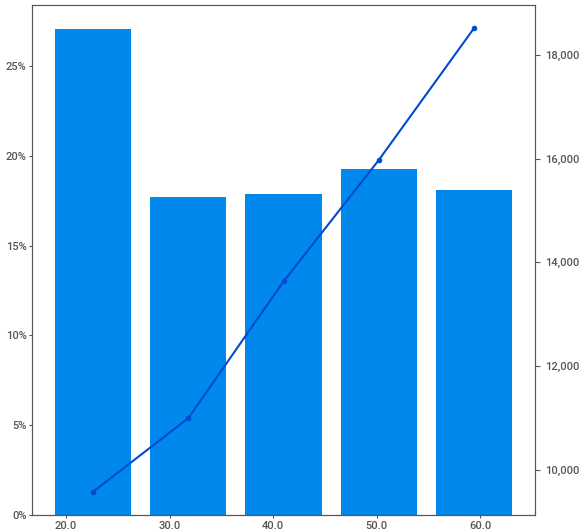
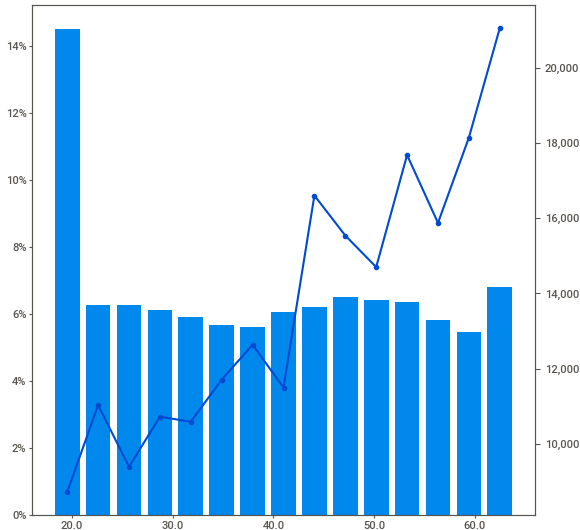
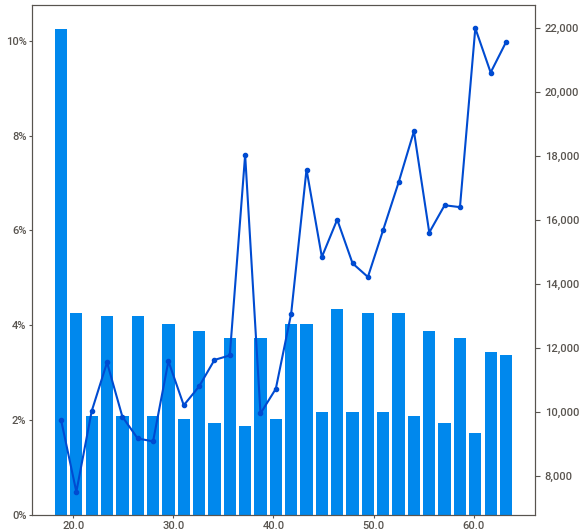
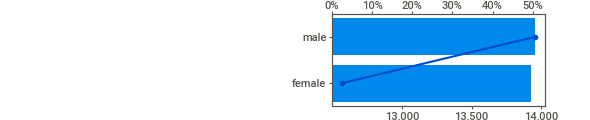
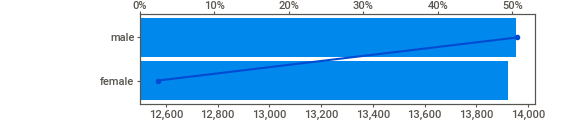
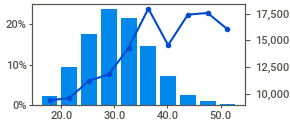
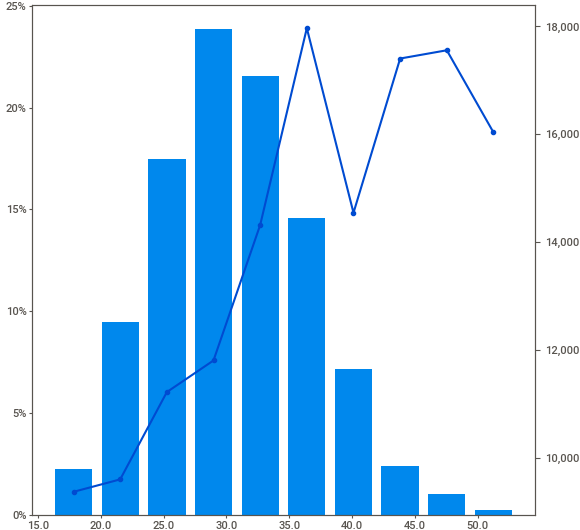
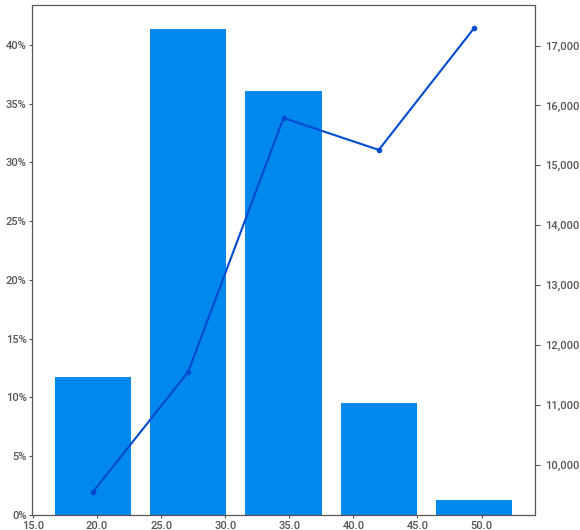
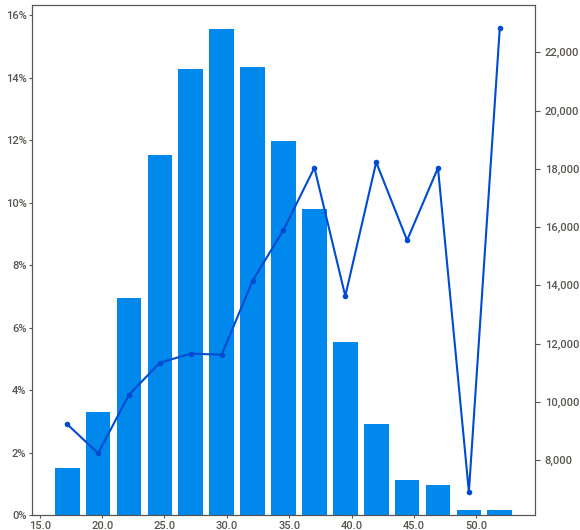
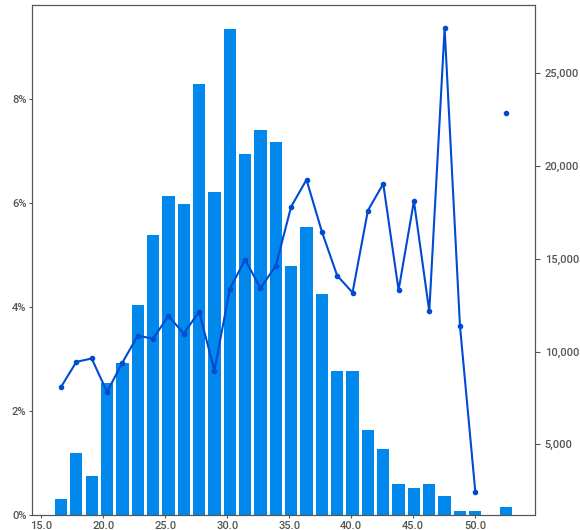
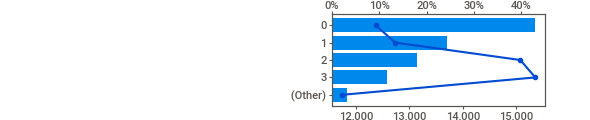
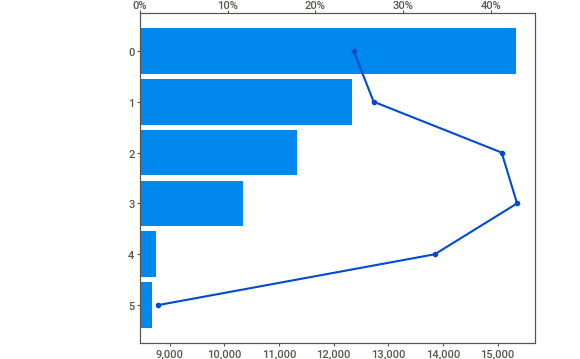
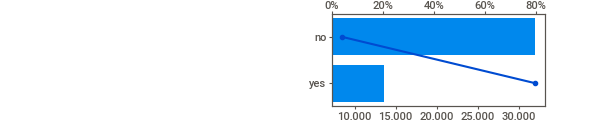
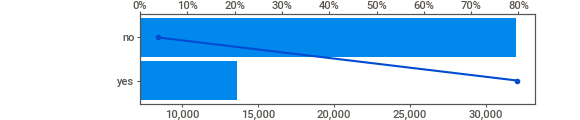
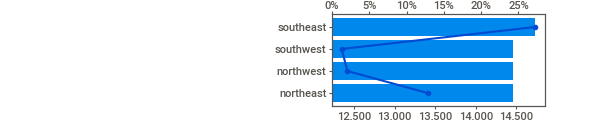
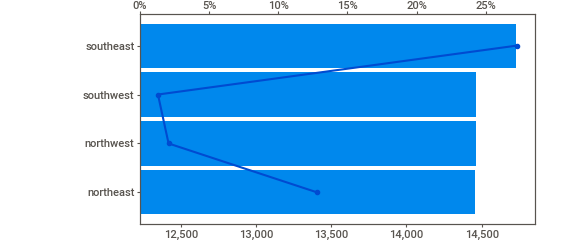
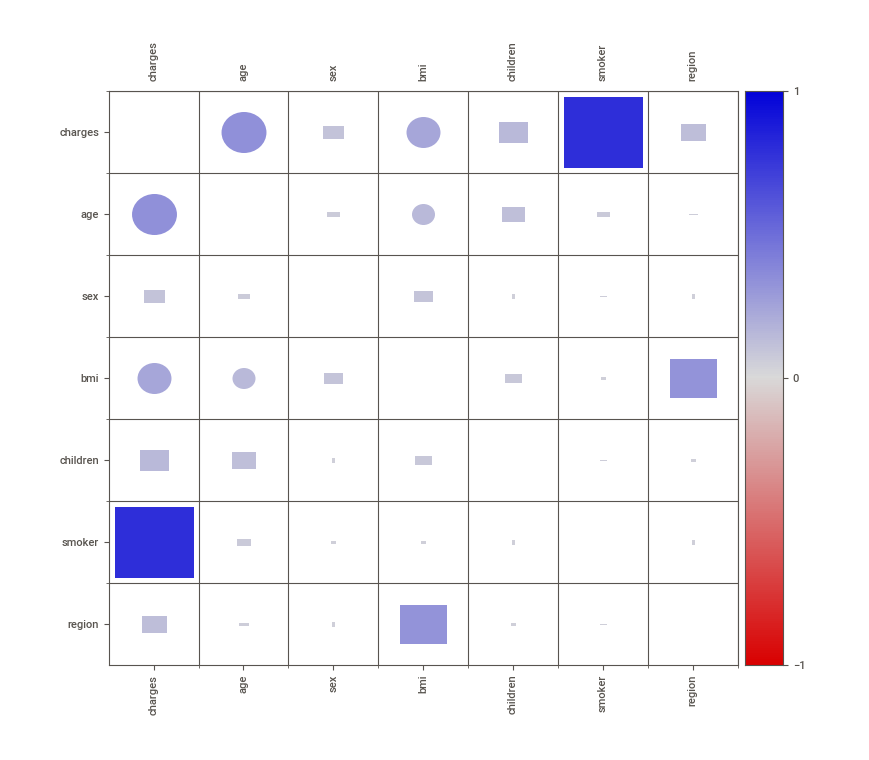
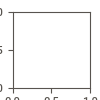

In [57]:
Relatorio_2.show_notebook()

In [58]:
Relatorio_3 = sweetviz.compare_intra(dados, dados["sex"] == "male", ["Male", "Female"], 'smoker') #Diferenciação por sexo (explorando documentação)

                                             |          | [  0%]   00:00 -> (? left)


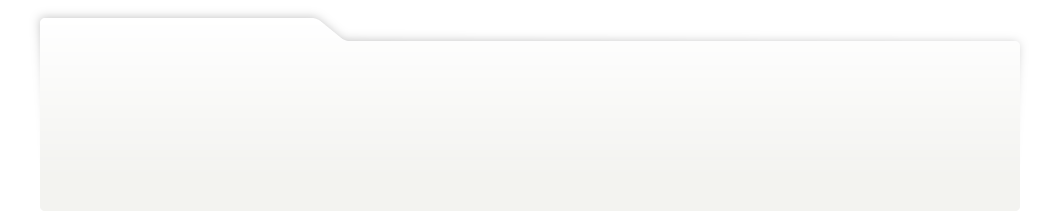
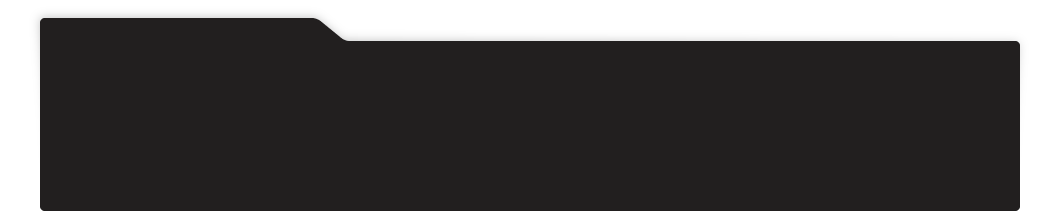
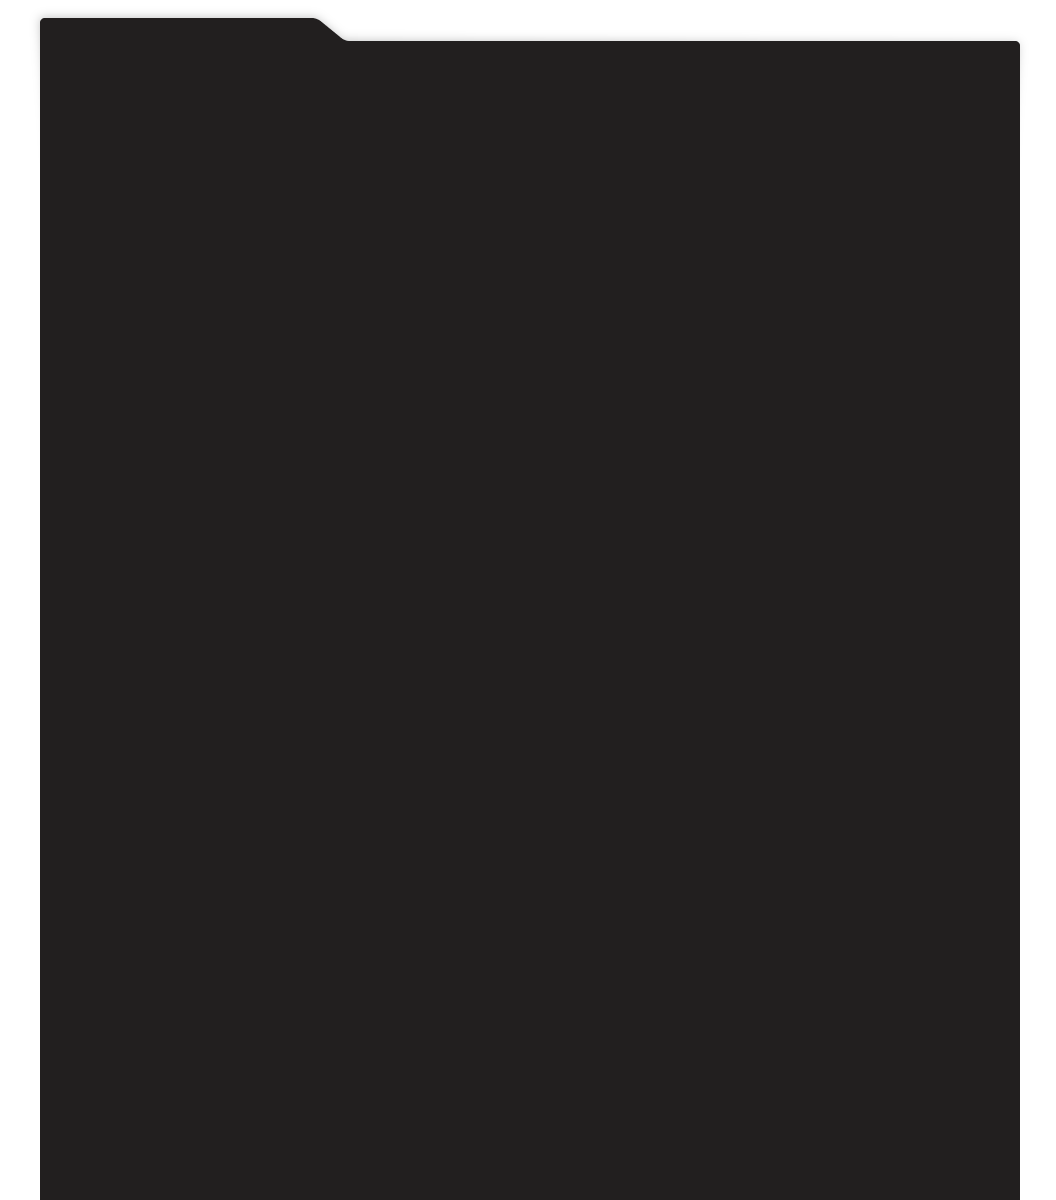
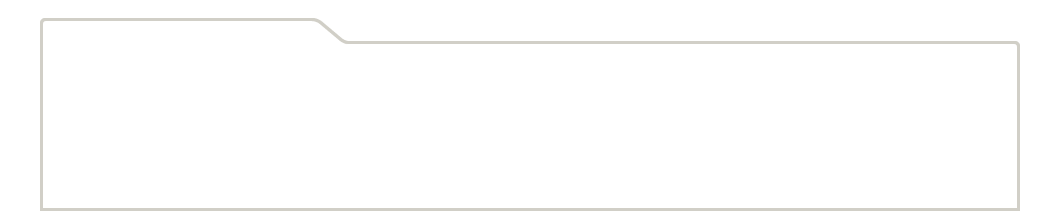
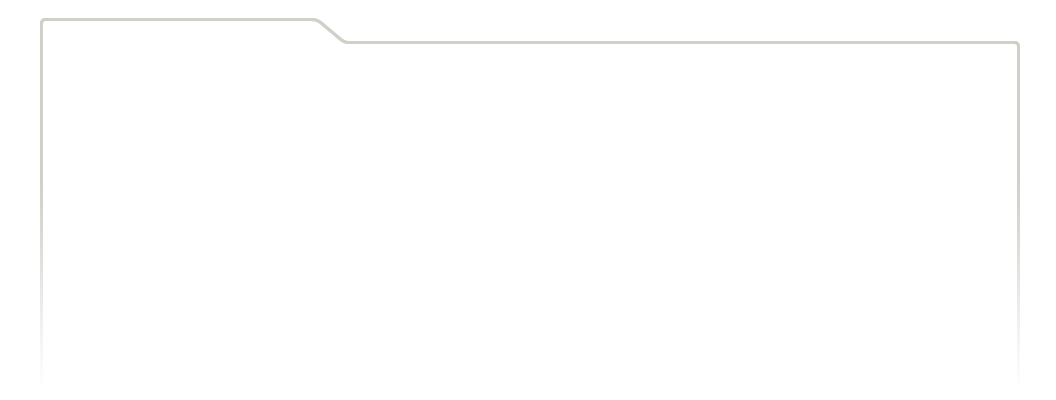
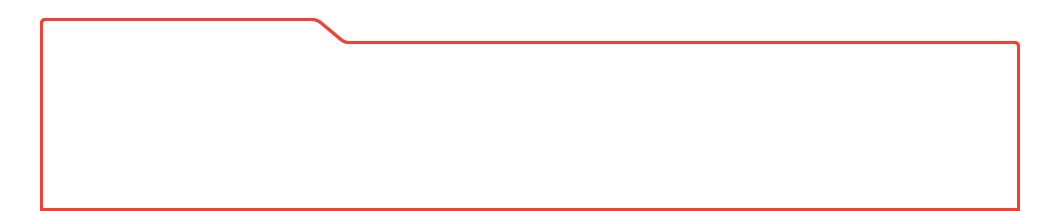
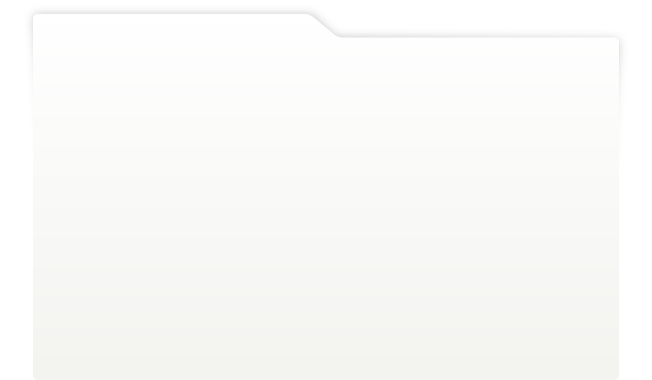
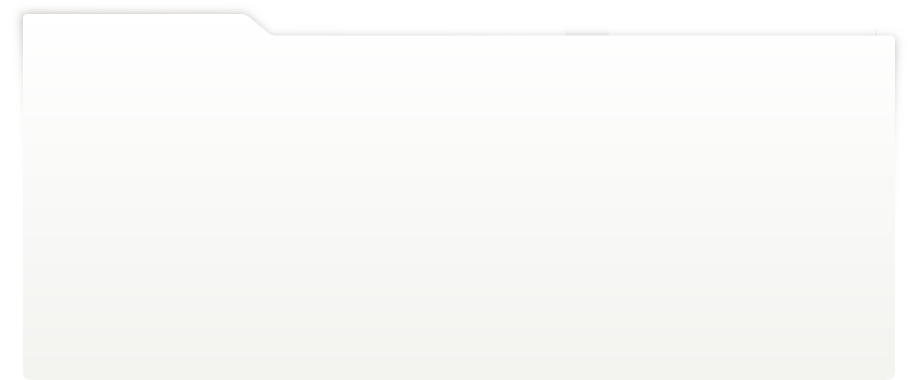
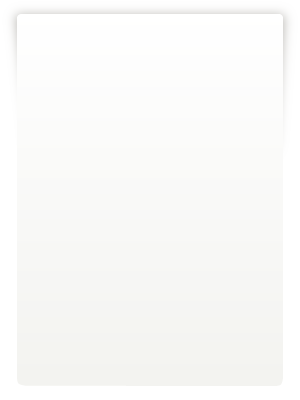
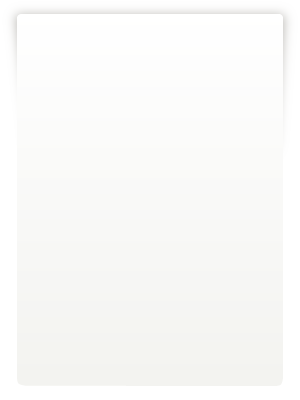
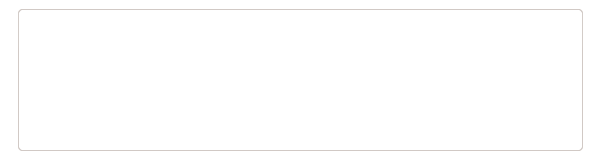
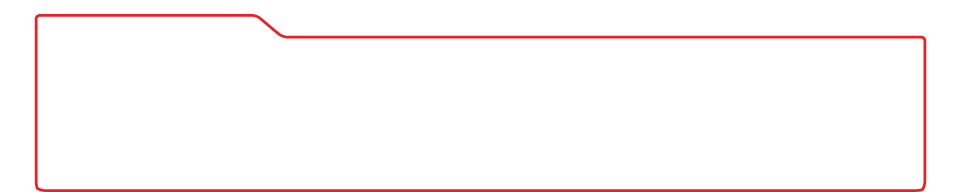
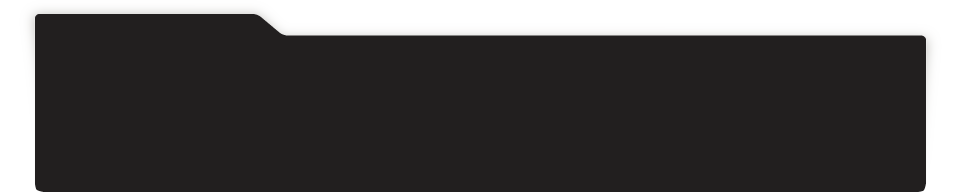
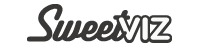
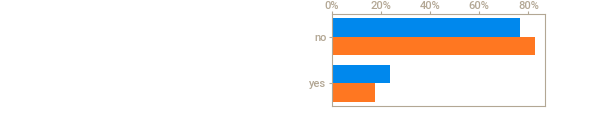
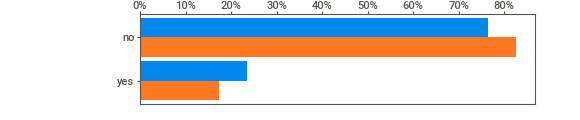
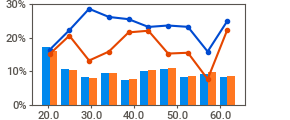
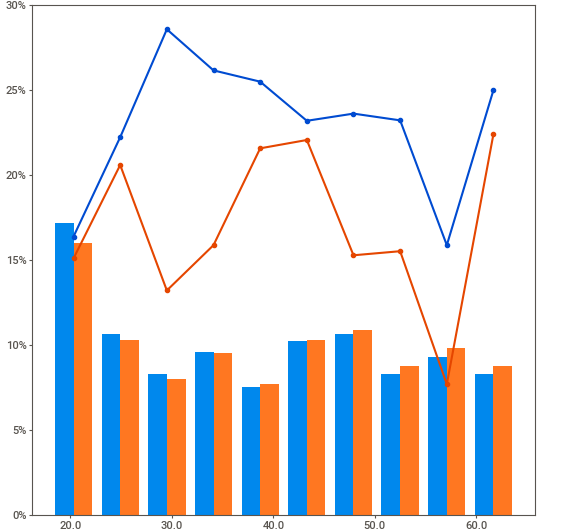
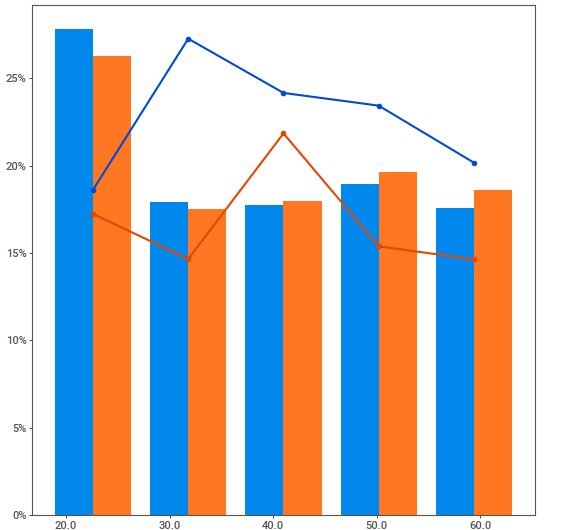
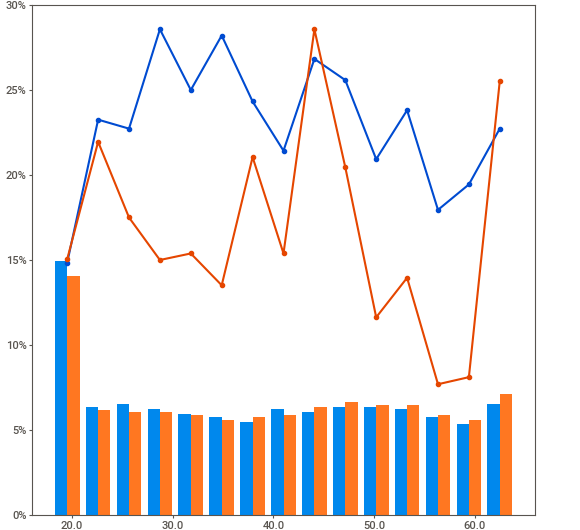
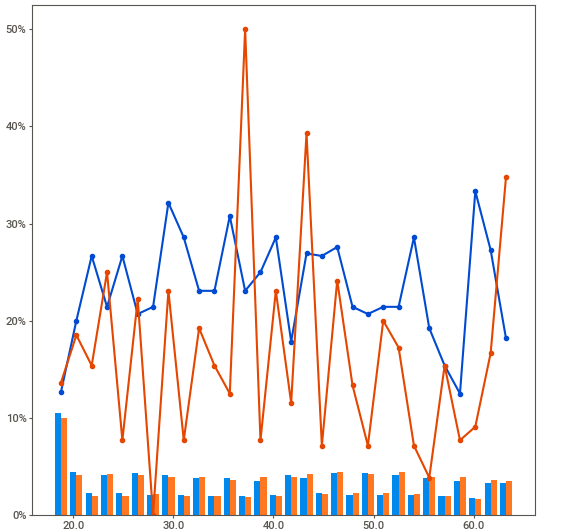
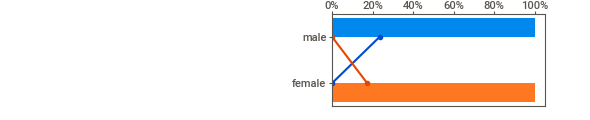
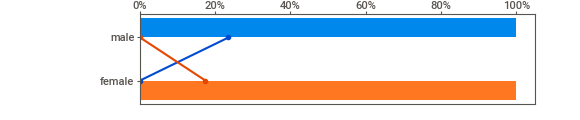
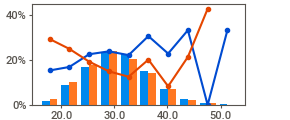
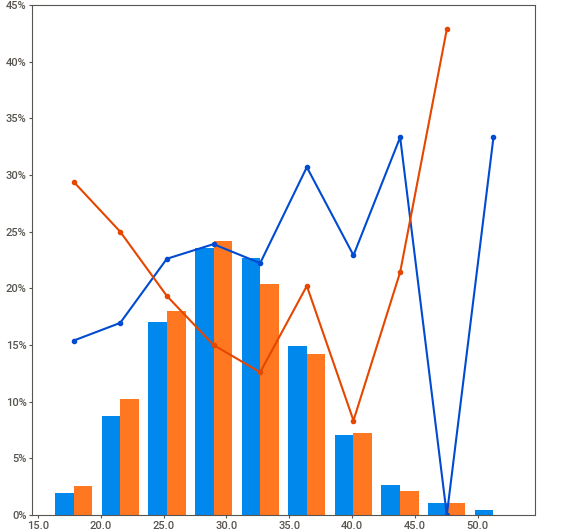
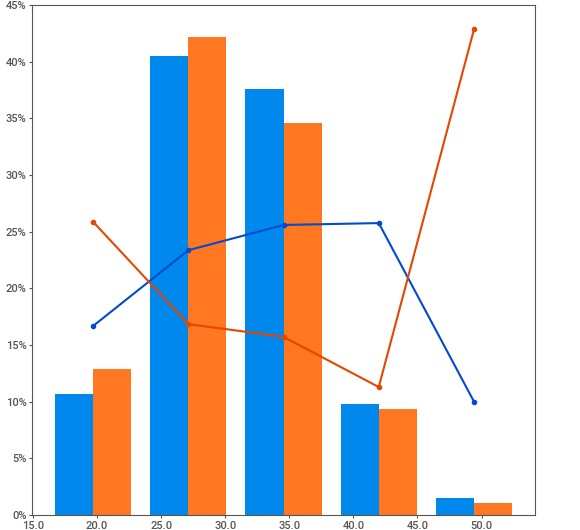
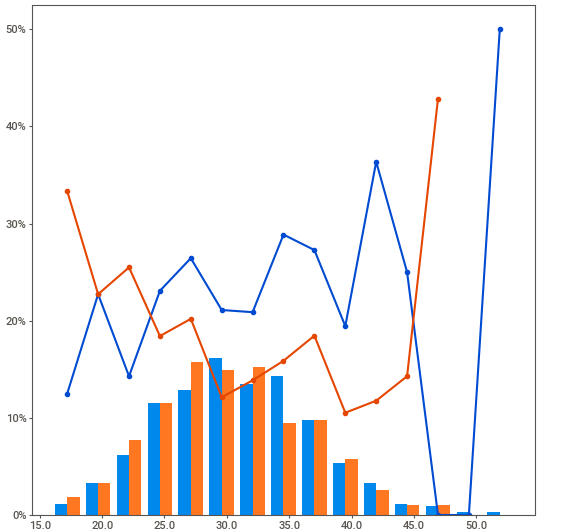
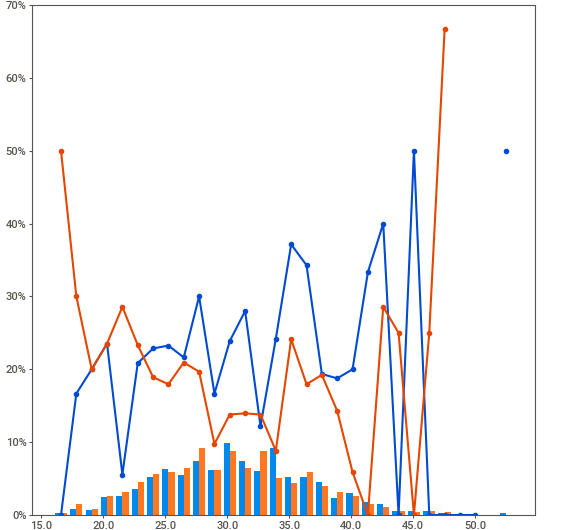
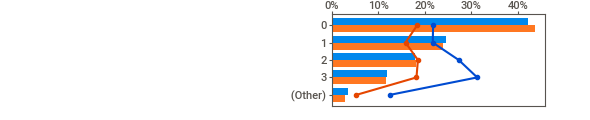
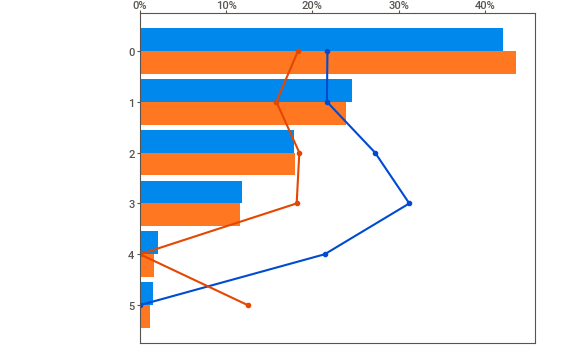
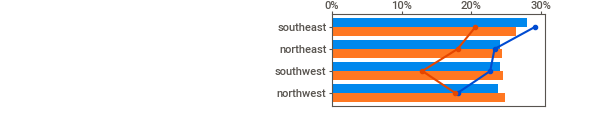
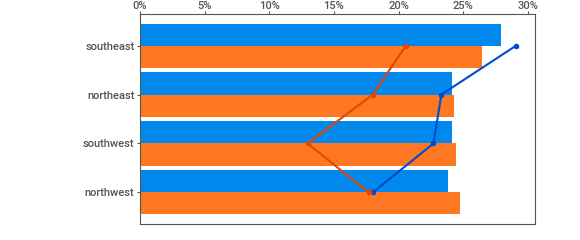
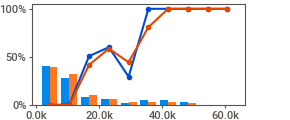
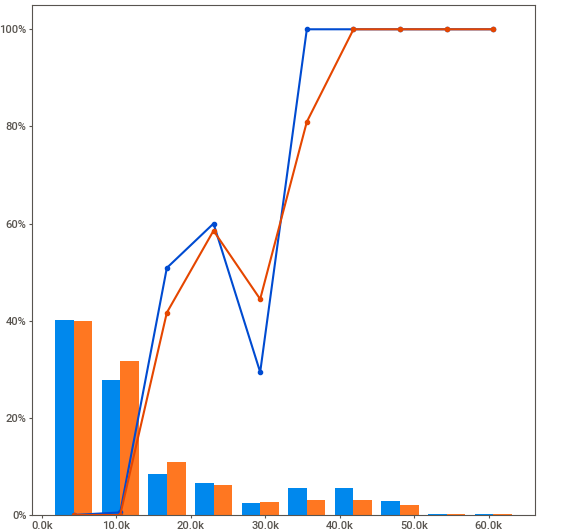
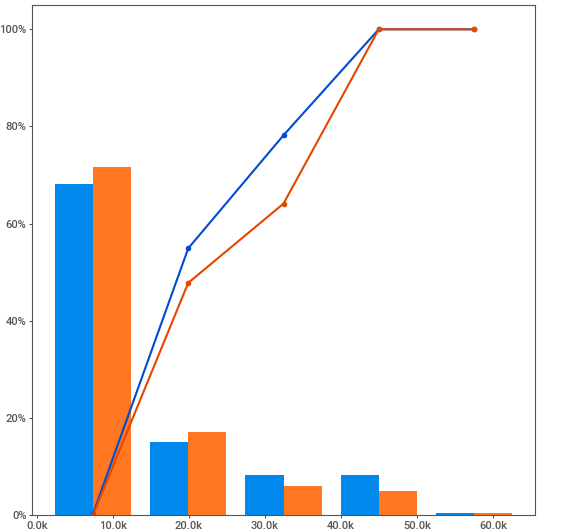
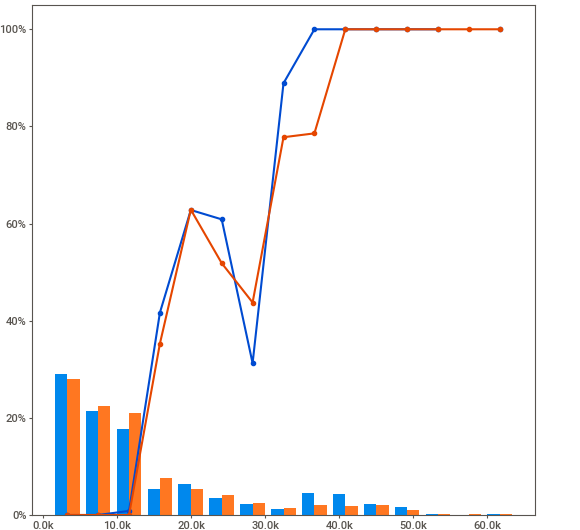
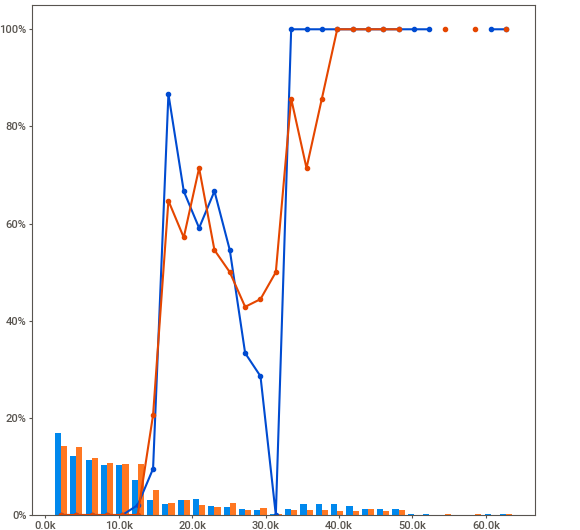
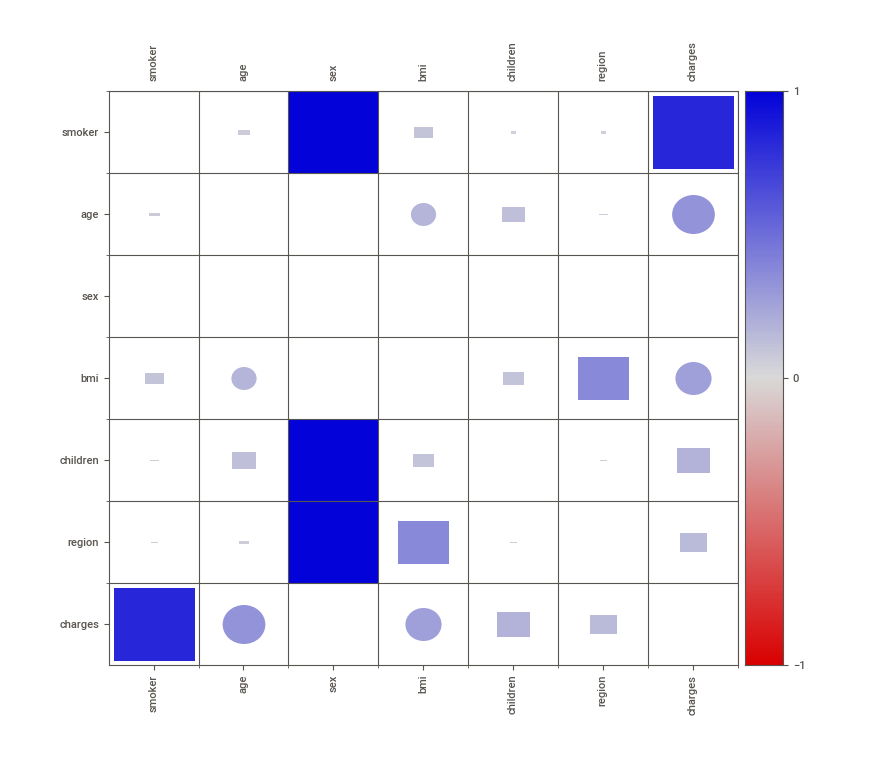
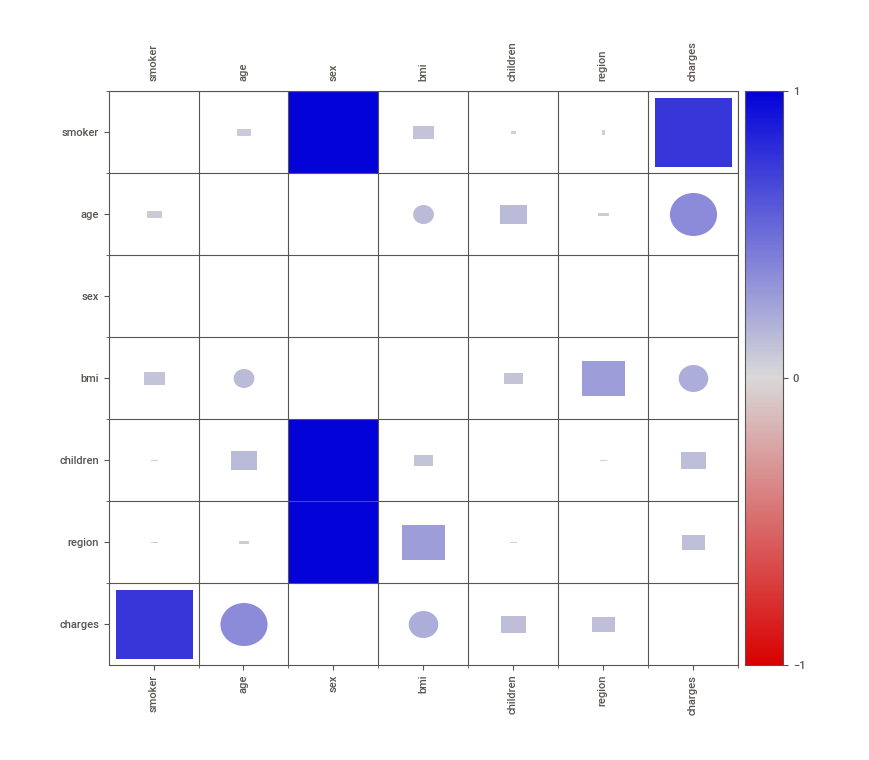

In [59]:
Relatorio_3.show_notebook()

In [60]:
#outra biblioteca de visualização de dados
%pip install autoviz 
from autoviz.AutoViz_Class import AutoViz_Class


In [61]:
AV = AutoViz_Class()


Shape of your Data Set loaded: (1338, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    7 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


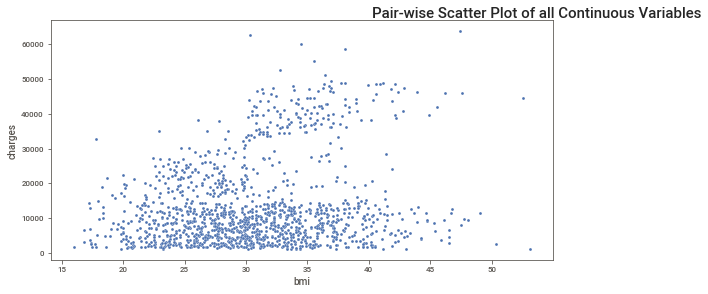

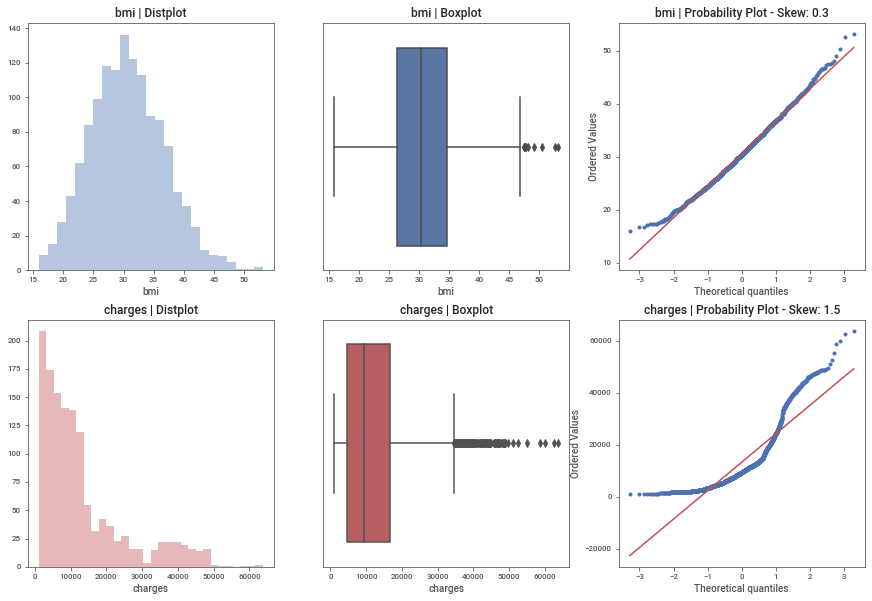

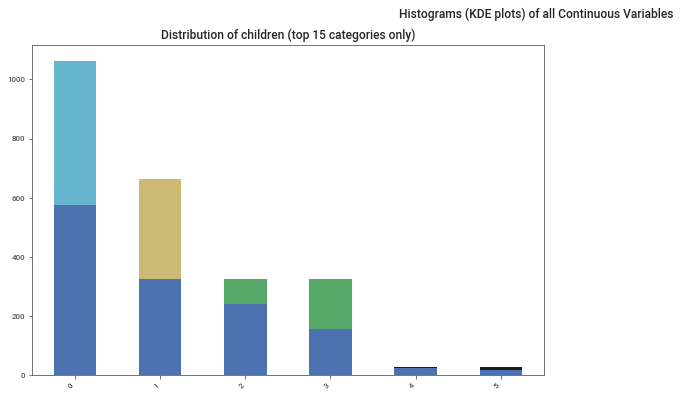

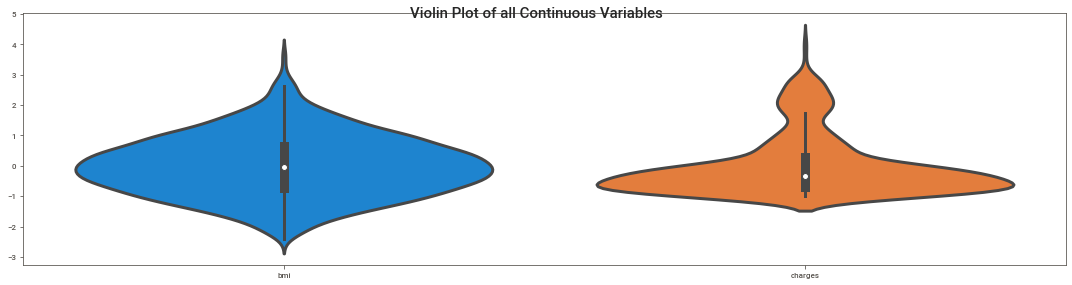

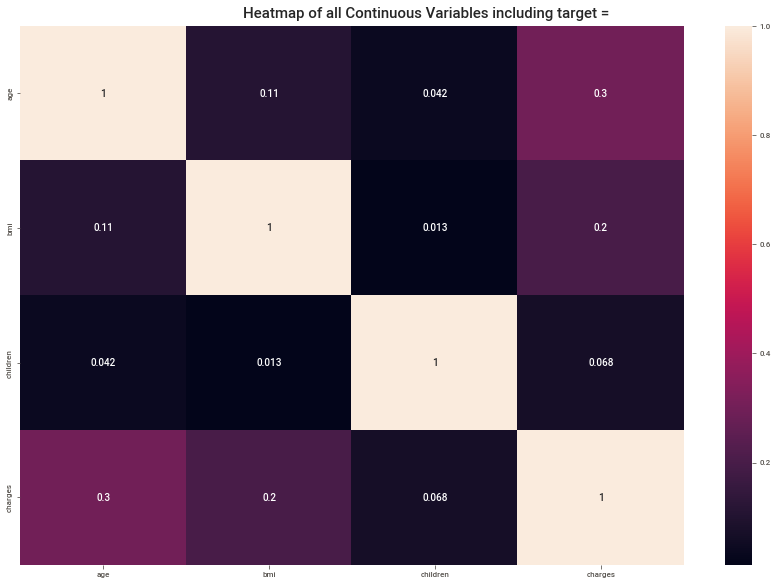

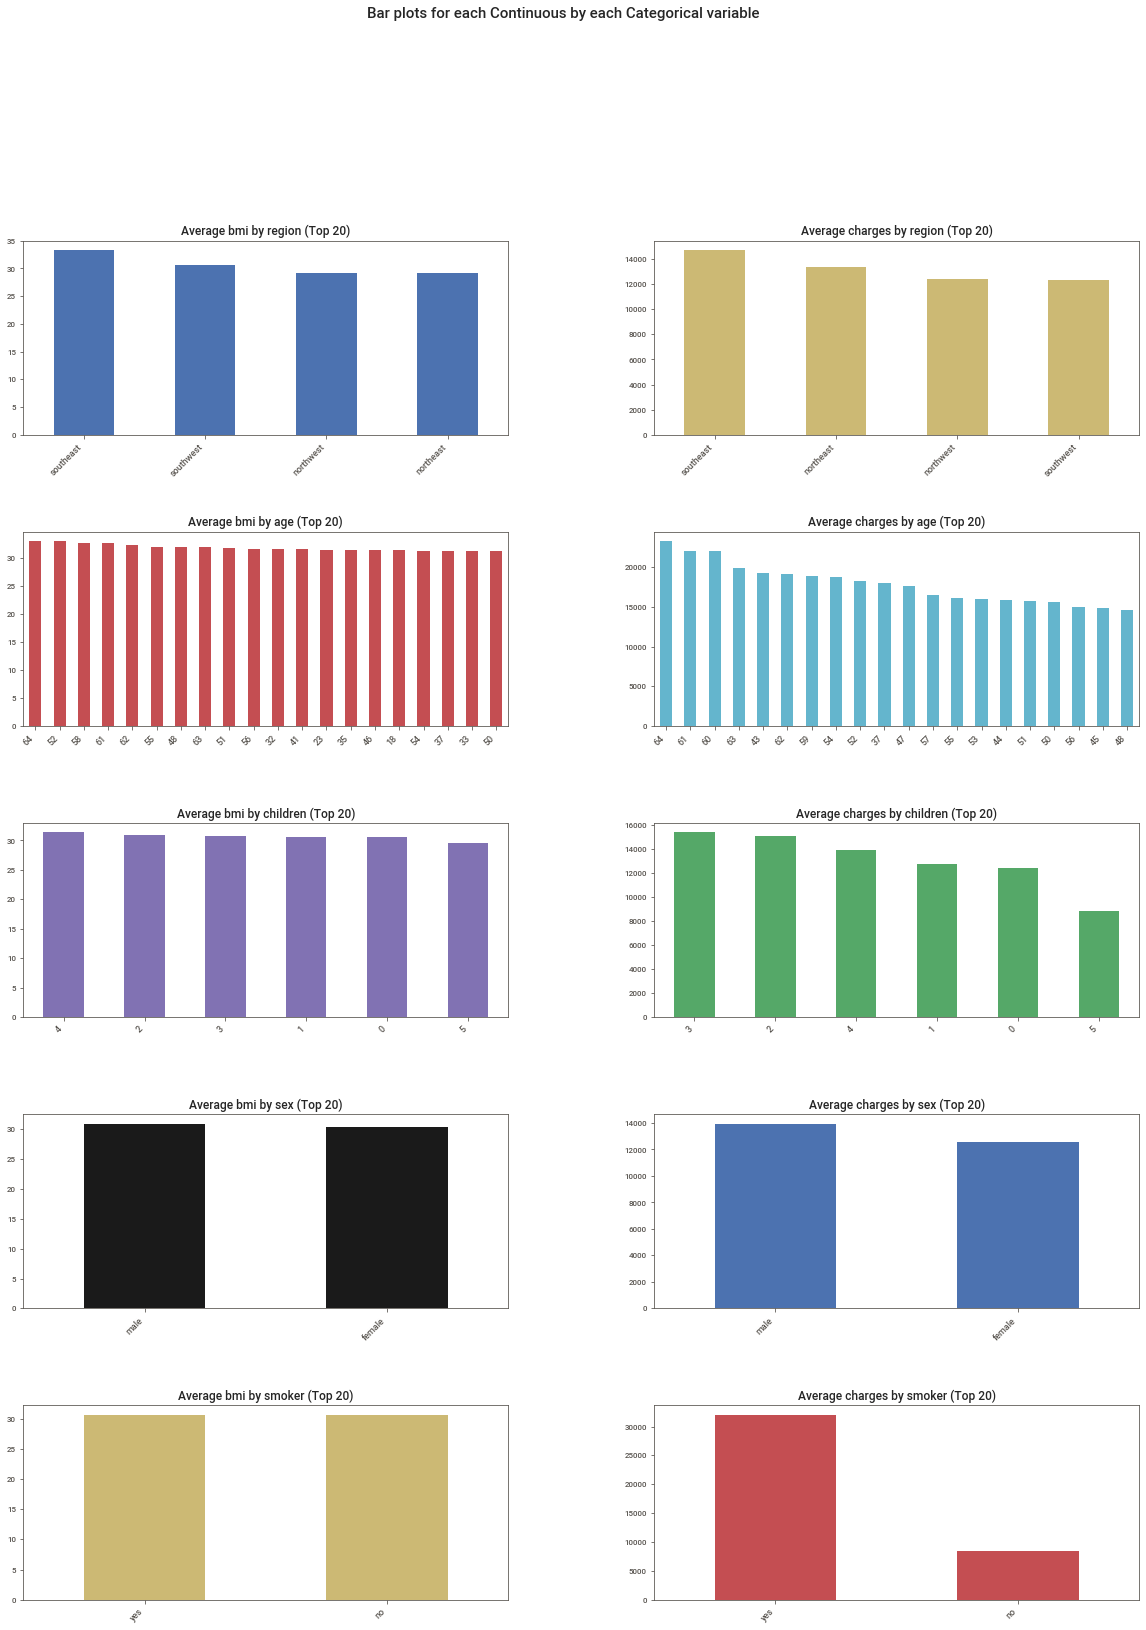

Time to run AutoViz (in seconds) = 5

 ###################### VISUALIZATION Completed ########################


In [62]:
Relatorio_4 = AV.AutoViz(gitds)

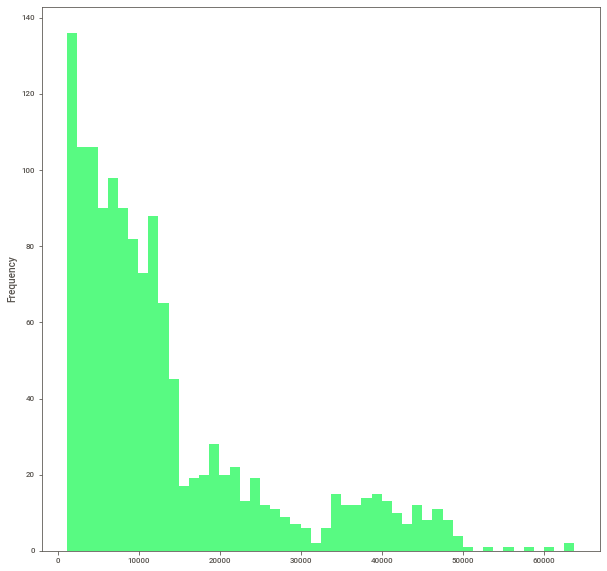

In [63]:
#A assimetria do gráfico de custos me chamou atenção, vamos visualizar ela individualmente:

dados.charges.plot(kind='hist', bins=50, figsize=(10,10), color = '#58FA82')
plt.show()

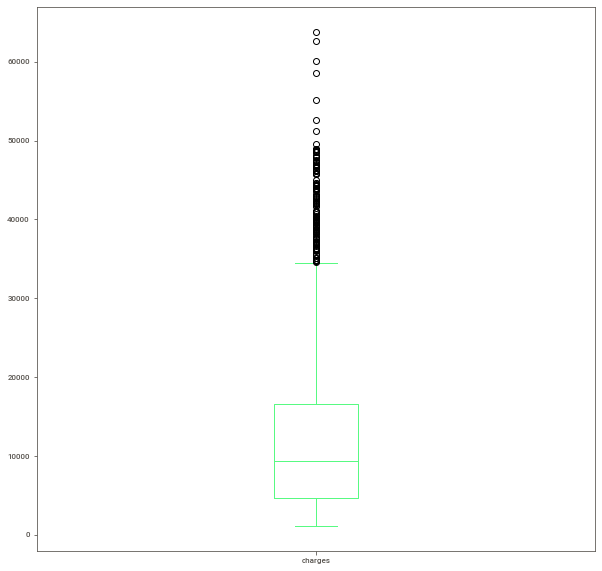

In [64]:
#Essa assimetria pode ser confirmada visualizando seu bloxplot = MUITO OUTLIERS!

dados.charges.plot(kind='box', figsize=(10,10), color = '#58FA82')
plt.show()


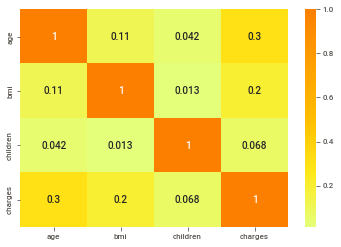

In [65]:
# correlation plot
corr = dados.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

**Insights:** Por se tratar de um conjunto de dados "pequeno" e  "limpo", considerei que as visualizações fornecidas por essas bibliotecas foram suficientes para me dar uma ideia geral da distribuição dos dados. 

Os pontos observados como, homens, pessoas consideravelmente acima do peso saúdavel e fumantes pagarem mais caro por um plano de saúde reenforçam o "senso comum". 

A ideia é utilizar desse conjunto de dados que eu já tenho noções sobre os dados e o que esperar para colocar em prática as técnicas de validação e os algorítmos de ML que eu estudei. 

Quanto a estrutura dos dados, não há dados faltantes e há apenas uma linha duplicada. No mais, o restante do pré-processamento desse *dataset* tende a ser curto.



## PRÉ-PROCESSAMENTO


In [66]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['sex'] = dados['sex'].map({'female': 1, 'male': 0})
dados['charges'] = dados['charges']/1000
dados = dados.drop_duplicates()

In [67]:
dados

age  sex     bmi  children  smoker     region    charges
0      19    1  27.900         0       1  southwest  16.884924
1      18    0  33.770         1       0  southeast   1.725552
2      28    0  33.000         3       0  southeast   4.449462
3      33    0  22.705         0       0  northwest  21.984471
4      32    0  28.880         0       0  northwest   3.866855
...   ...  ...     ...       ...     ...        ...        ...
1333   50    0  30.970         3       0  northwest  10.600548
1334   18    1  31.920         0       0  northeast   2.205981
1335   18    1  36.850         0       0  southeast   1.629833
1336   21    1  25.800         0       0  southwest   2.007945
1337   61    1  29.070         0       1  northwest  29.141360

[1337 rows x 7 columns]

## Machine Learning

---



## Cenário 1: Trabalhando com duas variáveis

In [68]:
#Variáveis para o modelo de previsões de custos de plano de saúde individual: 
X = dados[['bmi', 'smoker']] #variáveis explicativas 
y = dados['charges'] #target (variável resposta)

**Técnica Holdout:** 


1.   Divide dados em treino/teste;
2.   Escolhe a combinação de parâmetros com as melhores métricas.

Pouco usado na prática, principalmente quando há poucos dados (mais variabilidade)!

In [69]:
#Importando bibliotecas para modelagem
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

In [114]:
# Separando em dados teste e treinamento 


Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

#Test size = A proporção escolhida como teste. Menor número de dados, maior divisão teste/treinamento.
#FOCO: ter uma quantidade decente para teste e uma quantidade significativa pra treinar.


In [115]:
print(Xtreino.shape) #1002 dados de treino
print(Xteste.shape)  #335 dados de teste

(1002, 9)
(335, 9)


## Regressão Linear

In [116]:
reg = LinearRegression()  #Chamou Regressão Linear

reg.fit(Xtreino, ytreino) #Ajustando Regressão Linear apenas nos dados de TREINO! (75% dos dados)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
#Com o modelo treinado, hora de fazer predição:
previsao_treino = reg.predict(Xtreino)

previsao = reg.predict(Xteste)

In [118]:
#Algumas métricas da regressão linear: 
msetr = mean_squared_error(ytreino, previsao_treino)                                      
maetr = mean_absolute_error(ytreino, previsao_treino)
rmsetr = np.sqrt(metrics.mean_squared_error(ytreino, previsao_treino))

mse = mean_squared_error(yteste, previsao)                                      
mae = mean_absolute_error(yteste, previsao)
rmse = np.sqrt(metrics.mean_squared_error(yteste, previsao))
#Comparou o resultado predito no conjunto de dados de teste com os valores reais/observados (que estavam no yteste). MAE.
print('MSE : {}'.format(round(mse, 2)))
print('MAE : {}'.format(round(mae, 2))) 
print('RMSE : {}'.format(round(rmse, 2))) 

MSE : 41.93
MAE : 4.35
RMSE : 6.47


In [75]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -4.458890182869812
Coeficientes: 
 [ 0.42114078 24.07888044]


In [76]:

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

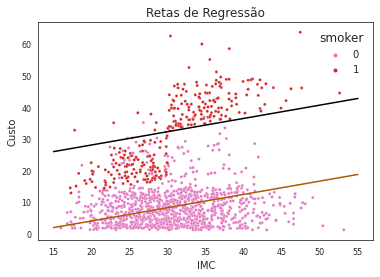

In [77]:
#Gráfico
sns.set_style("white")
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados, palette = 'tab10_r')
plt.plot(x, y0, color = '#ad5900')
plt.plot(x, y1, color = 'black')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()
#Apesar da melhora, a Regressão Linear ainda é limitada.

In [78]:
#Função preditora de custos com regressão linear

def calc_reg(bmi, smoking):
    y = ((smoking*reg.coef_[0]) + (bmi*reg.coef_[1])  + reg.intercept_)
    return y
    

In [79]:
print(calc_reg(36, 1))

862.8019464233818


## KNN 

In [80]:
#Recapitulando 

#Retomando variáveis
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

#Hodout 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 17  #número de "vizinhos"

modelo = KNeighborsRegressor(n_neighbors = k)  #definindo o modelo KNN
modelo.fit(Xtreino, ytreino) #ajustando os dados de treino

preditos_treino = modelo.predict(Xtreino)  #previsão com os dados de treino

preditos_teste = modelo.predict(Xteste) #previsão com os dados de teste



In [81]:
#Métricas
mse_treino = mean_squared_error(preditos_treino, ytreino) #métrica dados de treino
mae_treino = mean_absolute_error(preditos_treino, ytreino)
rmse_treino = np.sqrt(metrics.mean_squared_error(preditos_treino, ytreino))

mse_teste = mean_squared_error(preditos_teste, yteste) #métrica dados teste
mae_teste = mean_absolute_error(preditos_teste, yteste)
rmse_teste = np.sqrt(metrics.mean_squared_error(preditos_teste, yteste))

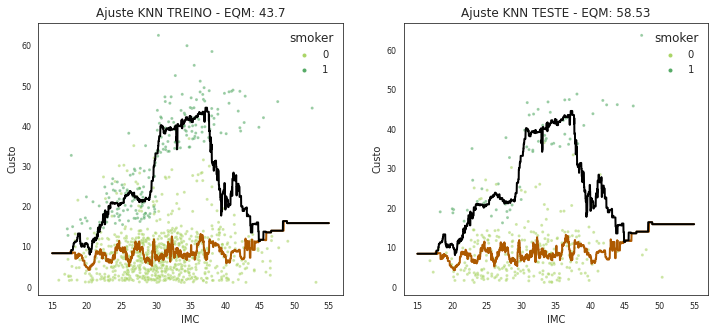

In [82]:
#Visualização
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))
sns.set_style("white")
plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6, palette= 'summer_r')
plt.plot(x, d0, '-', color = '#ad5900', linewidth = 2)
plt.plot(x, d1, '-', color = 'black', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(mse_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6, palette= 'summer_r')
plt.plot(x, d0, '-', color = '#ad5900', linewidth = 2)
plt.plot(x, d1, '-', color = 'black', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(mse_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()  #Feedback: Muito volátil!

## Árvore de decisão

In [83]:
#Retomando dados 

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)


profundidade = 4 #o quanto a minha árvore vai crescer
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino) #ajustando a árvore

preditos_treino_1 = arvore.predict(Xtreino) 
preditos_teste_1 = arvore.predict(Xteste)


In [84]:
#Métricas
mse_treino_1 = mean_squared_error(preditos_treino_1, ytreino)
mae_treino_1 = mean_absolute_error(preditos_treino_1, ytreino)
rmse_treino_1 = np.sqrt(metrics.mean_squared_error(preditos_treino_1, ytreino))


mse_teste_1 = mean_squared_error(preditos_teste_1, yteste) 
mae_teste_1 = mean_absolute_error(preditos_teste_1, yteste)
rmse_teste_1 = np.sqrt(metrics.mean_squared_error(preditos_teste_1, yteste))

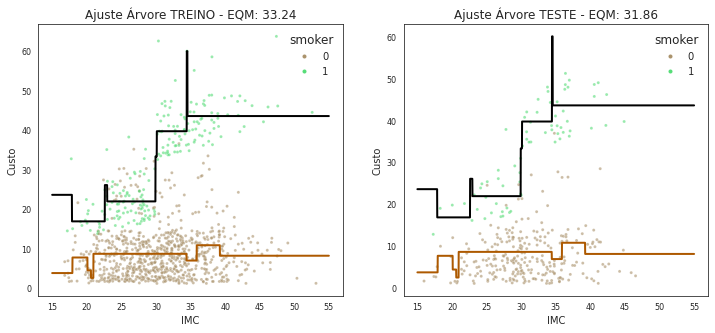

In [85]:
#Visualização 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))
sns.set_style("white")
plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6, palette= 'terrain_r')
plt.plot(x, d0, '-', color = '#ad5900', linewidth = 2)
plt.plot(x, d1, '-', color = 'black', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(mse_treino_1, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6, palette= 'terrain_r')
plt.plot(x, d0, '-', color = '#ad5900', linewidth = 2)
plt.plot(x, d1, '-', color = 'black', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(mse_teste_1, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

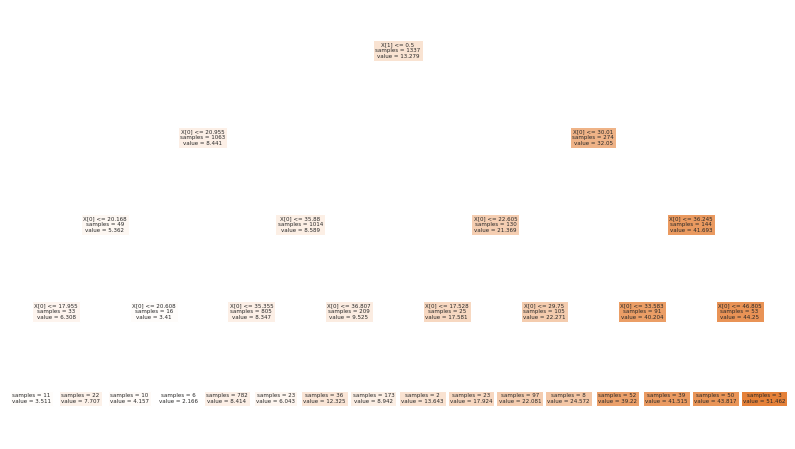

In [86]:
# Gráfico da Árvore

from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

In [87]:
modelos = [('Regressão Linear', msetr, mse, maetr, mae, rmsetr, rmse),
          ('KNN', mse_treino, mse_teste, mae_treino, mae_teste, rmse_treino, rmse_teste),
          ('Árvore de Decisão', mse_treino_1, mse_teste_1, mae_treino_1, mae_teste_1, rmse_treino_1, rmse_teste_1)   
         ]

In [88]:
df = pd.DataFrame(data = modelos, columns=['Modelo', 'MSE TREINO', 'MSE TESTE', 'MAE TREINO', 'MAE TESTE', 'RMSE TREINO', 'RMSE TESTE'])
df

Modelo  MSE TREINO  MSE TESTE  ...  MAE TESTE  RMSE TREINO  RMSE TESTE
0   Regressão Linear   47.415544  58.615862  ...   5.813395     6.885895    7.656100
1                KNN   43.701820  58.530118  ...   5.222943     6.610735    7.650498
2  Árvore de Decisão   33.243662  31.856560  ...   4.430177     5.765732    5.644162

[3 rows x 7 columns]

## Cenário 2 : Usando todas variáveis respostas

In [89]:
#Dummyficando outros dados
dados = pd.get_dummies(dados)

In [90]:
dados

age  sex     bmi  ...  region_northwest  region_southeast  region_southwest
0      19    1  27.900  ...                 0                 0                 1
1      18    0  33.770  ...                 0                 1                 0
2      28    0  33.000  ...                 0                 1                 0
3      33    0  22.705  ...                 1                 0                 0
4      32    0  28.880  ...                 1                 0                 0
...   ...  ...     ...  ...               ...               ...               ...
1333   50    0  30.970  ...                 1                 0                 0
1334   18    1  31.920  ...                 0                 0                 0
1335   18    1  36.850  ...                 0                 1                 0
1336   21    1  25.800  ...                 0                 0                 1
1337   61    1  29.070  ...                 1                 0                 0

[1337 rows x 10 columns]

In [91]:
#Definindo
X = dados.drop("charges", axis=1)
y = dados["charges"].values.reshape(-1,1)

#Dividindo entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25)

In [92]:
X

age  sex     bmi  ...  region_northwest  region_southeast  region_southwest
0      19    1  27.900  ...                 0                 0                 1
1      18    0  33.770  ...                 0                 1                 0
2      28    0  33.000  ...                 0                 1                 0
3      33    0  22.705  ...                 1                 0                 0
4      32    0  28.880  ...                 1                 0                 0
...   ...  ...     ...  ...               ...               ...               ...
1333   50    0  30.970  ...                 1                 0                 0
1334   18    1  31.920  ...                 0                 0                 0
1335   18    1  36.850  ...                 0                 1                 0
1336   21    1  25.800  ...                 0                 0                 1
1337   61    1  29.070  ...                 1                 0                 0

[1337 rows x 9 columns]

## Regressão Linear

In [93]:
reg = LinearRegression() 

reg.fit(X_treino, y_treino) 

previsao = reg.predict(X_teste)

previsao_treino = reg.predict(X_treino)

In [94]:
reg.coef_

array([[ 0.2480642 ,  0.13164298,  0.34401513,  0.48467829, 24.25199891,
         0.66671389, -0.05935289, -0.37584035, -0.23152065]])

In [95]:
#Métricas: 
msetr1 = mean_squared_error(y_treino, previsao_treino)                                      
maetr1 = mean_absolute_error(y_treino, previsao_treino)
rmsetr1 = np.sqrt(metrics.mean_squared_error(y_treino, previsao_treino))

mse1 = mean_squared_error(y_teste, previsao)                                      
mae1 = mean_absolute_error(y_teste, previsao)
rmse1 = np.sqrt(metrics.mean_squared_error(y_teste, previsao))

print('MSE : {}'.format(round(mse1, 2)))
print('MAE : {}'.format(round(mae1, 2))) 
print('RMSE : {}'.format(round(rmse1, 2))) 


MSE : 34.34
MAE : 4.22
RMSE : 5.86


## KNN

In [96]:
#Retomando variáveis
X = dados.drop("charges", axis=1)
y = dados["charges"].values.reshape(-1,1)

 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 17 

modelo = KNeighborsRegressor(n_neighbors = k) 
modelo.fit(Xtreino, ytreino) 

preditos_treino = modelo.predict(Xtreino)  

preditos_teste = modelo.predict(Xteste) 


In [97]:
#Métricas
mse_treino1 = mean_squared_error(preditos_treino, ytreino)
mae_treino1 = mean_absolute_error(preditos_treino, ytreino)
rmse_treino1 = np.sqrt(metrics.mean_squared_error(preditos_treino, ytreino))

mse_teste1 = mean_squared_error(preditos_teste, yteste) 
mae_teste1 = mean_absolute_error(preditos_teste, yteste)
rmse_teste1 = np.sqrt(metrics.mean_squared_error(preditos_teste, yteste))



#Árvore de decisão

In [98]:
#Retomando dados 

X = dados.drop("charges", axis=1)
y = dados["charges"].values.reshape(-1,1)
 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)


profundidade = 4 #o quanto a minha árvore vai crescer
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino) #ajustando a árvore

preditos_treino_1 = arvore.predict(Xtreino) 
preditos_teste_1 = arvore.predict(Xteste)


In [99]:
#Métricas
mse_treino_2 = mean_squared_error(preditos_treino_1, ytreino)
mae_treino_2 = mean_absolute_error(preditos_treino_1, ytreino)
rmse_treino_2 = np.sqrt(metrics.mean_squared_error(preditos_treino_1, ytreino))


mse_teste_2 = mean_squared_error(preditos_teste_1, yteste) 
mae_teste_2 = mean_absolute_error(preditos_teste_1, yteste)
rmse_teste_2 = np.sqrt(metrics.mean_squared_error(preditos_teste_1, yteste))


In [100]:
modelos = [('Regressão Linear', msetr1, mse1, maetr1, mae1, rmsetr1, rmse1),
          ('KNN', mse_treino1, mse_teste1, mae_treino1, mae_teste1, rmse_treino1, rmse_teste1),
          ('Árvore de Decisão', mse_treino_2, mse_teste_2, mae_treino_2, mae_teste_2, rmse_treino_2, rmse_teste_2)   
         ]

In [101]:
df = pd.DataFrame(data = modelos, columns=['Modelo', 'MSE TREINO', 'MSE TESTE', 'MAE TREINO', 'MAE TESTE', 'RMSE TREINO', 'RMSE TESTE'])
df

Modelo  MSE TREINO  ...  RMSE TREINO  RMSE TESTE
0   Regressão Linear   37.374924  ...     6.113503    5.859949
1                KNN  110.610665  ...    10.517160   11.315005
2  Árvore de Decisão   18.038584  ...     4.247185    5.084312

[3 rows x 7 columns]